In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [4]:
#Load the dataset
df=pd.read_csv('marketing_AB.csv')

In [14]:
#Understand the data
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [6]:
print(df.shape)

(588101, 7)


In [25]:
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [43]:
df.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [7]:
#Clean the dataset
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
#To check the unique values of categorical data
df['converted'].value_counts()

converted
False    573258
True      14843
Name: count, dtype: int64

In [11]:
#To check the different test groups and the data distribution
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [54]:
#Split into people that saw ads and people that saw psa
ads=df[df['test group']=="ad"]
psas=df[df['test group']=="psa"]

In [26]:
#To show the amount of people who bought the product after seeing the ad and the people that didn't
ads['converted'].value_counts()

converted
False    550154
True      14423
Name: count, dtype: int64

In [ ]:
#The ads have a 2.6% conversion rate

In [17]:
#To show the amount of people who bought the product after seeing the ad and the people that didn't
psas['converted'].value_counts()

converted
False    23104
True       420
Name: count, dtype: int64

In [ ]:
#The psas have a 1.78% conversion rate

In [26]:
#Filter all the people that bought a product
converted=df[df['converted'] == True]

In [28]:
#To filter the ones that did not
unconverted=df[df['converted'] == False]

In [27]:
converted.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
15,15,1461774,ad,True,9,Wednesday,18
44,44,1355531,ad,True,265,Tuesday,12
107,107,1389878,ad,True,1328,Saturday,19
121,121,1475989,ad,True,323,Saturday,20
135,135,1241733,ad,True,246,Friday,20


In [29]:
#To get the most amount of ads shown in each hour for each converted person
convads=converted['most ads hour'].value_counts().sort_index()
convads

most ads hour
0      102
1       62
2       39
3       28
4       11
5       16
6       46
7      116
8      344
9      595
10     838
11    1022
12    1127
13    1176
14    1281
15    1325
16    1156
17     987
18     885
19     811
20     862
21     867
22     690
23     457
Name: count, dtype: int64

<Axes: xlabel='most ads hour', ylabel='count'>

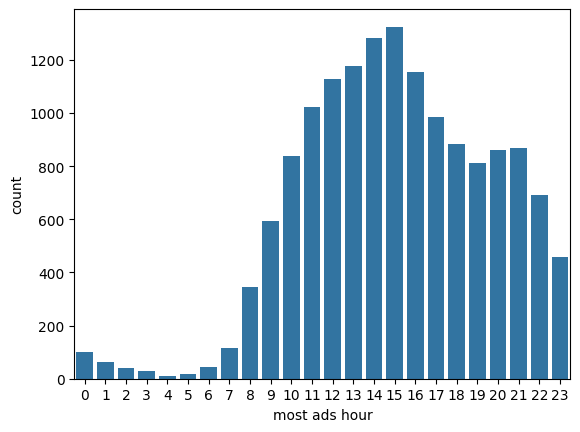

In [30]:
sns.barplot(convads)

In [ ]:
#The converted people were shown the most ads around 3pm

In [32]:
unconvads=unconverted['most ads hour'].value_counts().sort_index()
unconvads

most ads hour
0      5434
1      4740
2      5294
3      2651
4       711
5       749
6      2022
7      6289
8     17283
9     30409
10    38101
11    45188
12    46171
13    46479
14    44367
15    43358
16    36411
17    34001
18    31438
19    29541
20    28061
21    29109
22    25742
23    19709
Name: count, dtype: int64

<Axes: xlabel='most ads hour', ylabel='count'>

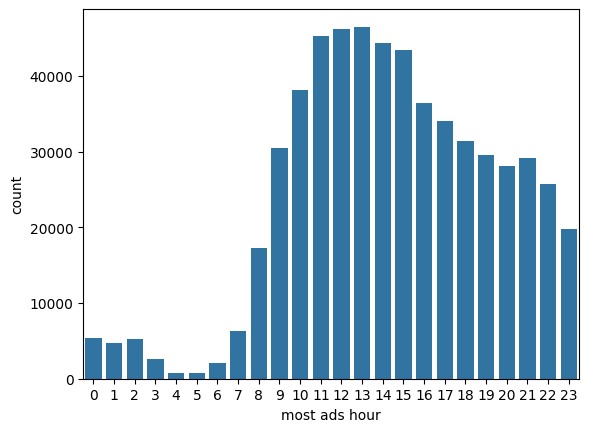

In [33]:
sns.barplot(unconvads)

In [22]:
#To get the most amount of ads shown each day to converted viewers
converted['most ads day'].value_counts().sort_values()

most ads day
Saturday     1719
Thursday     1790
Wednesday    2018
Friday       2057
Sunday       2090
Tuesday      2312
Monday       2857
Name: count, dtype: int64

In [ ]:
#Converted viewers were shown the most ads on Monday

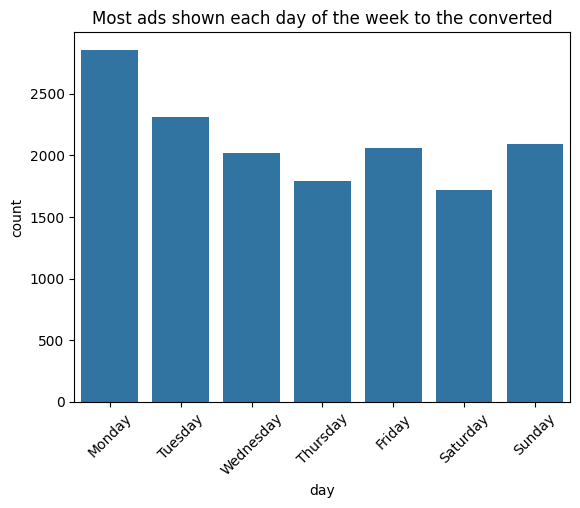

In [40]:
val = converted['most ads day'].value_counts()

# Convert to DataFrame for plotting
val_df = val.reset_index()
val_df.columns = ['day', 'count']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=val_df, x='day', y='count', order=day_order)
plt.xticks(rotation=45)
plt.title('Most ads shown each day of the week to the converted')
plt.show()


In [24]:
#To get the most amount of ads shown each day to unconverted viewers
unconverted['most ads day'].value_counts().sort_values()

most ads day
Tuesday      75167
Wednesday    78890
Saturday     79941
Thursday     81192
Sunday       83301
Monday       84216
Friday       90551
Name: count, dtype: int64

In [46]:
#To get the average total ads shown to people who bought the product and
# people who didnt 
avg = df.groupby('converted')['total ads'].mean()
avg

converted
False    23.291495
True     83.887759
Name: total ads, dtype: float64

In [ ]:
#The people who bought products were shown over 3 times the ads than the people who didn't buy

In [67]:
#To run a chi square test to find out if there is a statistical significance between converted people from ads
# and converted people from psas  

# Create the contingency table
table = pd.crosstab(df['test group'], df['converted'],rownames=['test group'], 
                    colnames=['Converted'])

In [68]:
print(table)

Converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [69]:
# Run the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 54.005823883685245
p-value: 1.9989623063390075e-13
Degrees of freedom: 1
Expected frequencies:
[[550327.71899045  14249.28100955]
 [ 22930.28100955    593.71899045]]


In [ ]:
#The p-value is less than 0.05. This tells us that there is a statistical significance between the two groups
# It tells us that the difference in outcomes in not due to chance
# It tells us that the ads do have an effect on sales 